[Text(0, 0, '2021-07-02'),
 Text(10, 0, '2021-07-19'),
 Text(20, 0, '2021-08-02'),
 Text(30, 0, '2021-08-16'),
 Text(40, 0, '2021-08-30'),
 Text(50, 0, '2021-09-14'),
 Text(60, 0, '2021-09-28'),
 Text(70, 0, '2021-10-12'),
 Text(80, 0, '2021-10-26'),
 Text(90, 0, '2021-11-09'),
 Text(100, 0, '2021-11-23'),
 Text(110, 0, '2021-12-08'),
 Text(120, 0, '2021-12-22'),
 Text(130, 0, '2022-01-06'),
 Text(140, 0, '2022-01-21'),
 Text(150, 0, '2022-02-04'),
 Text(160, 0, '2022-02-18'),
 Text(170, 0, '2022-03-07'),
 Text(180, 0, '2022-03-21'),
 Text(190, 0, '2022-04-04'),
 Text(200, 0, '2022-04-19'),
 Text(210, 0, '2022-05-03'),
 Text(220, 0, '2022-05-17'),
 Text(230, 0, '2022-06-01'),
 Text(240, 0, '2022-06-15'),
 Text(250, 0, '2022-06-30')]

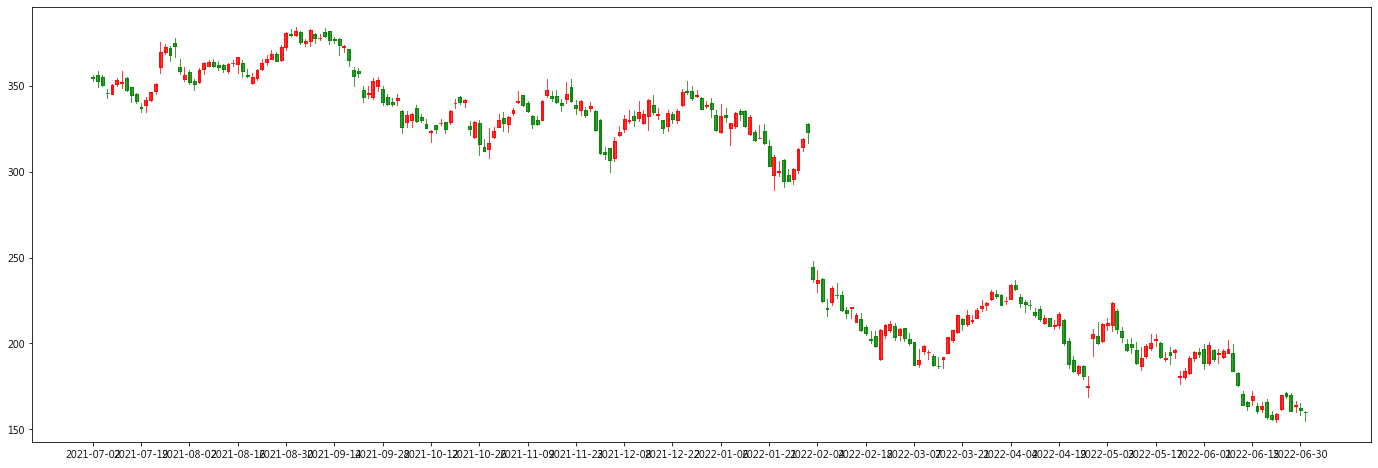

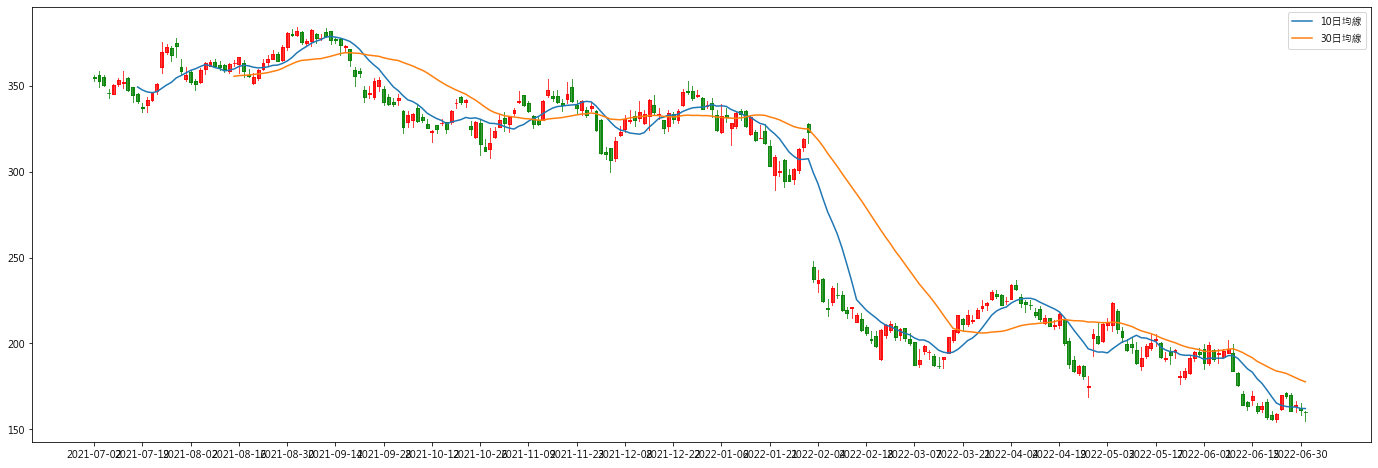

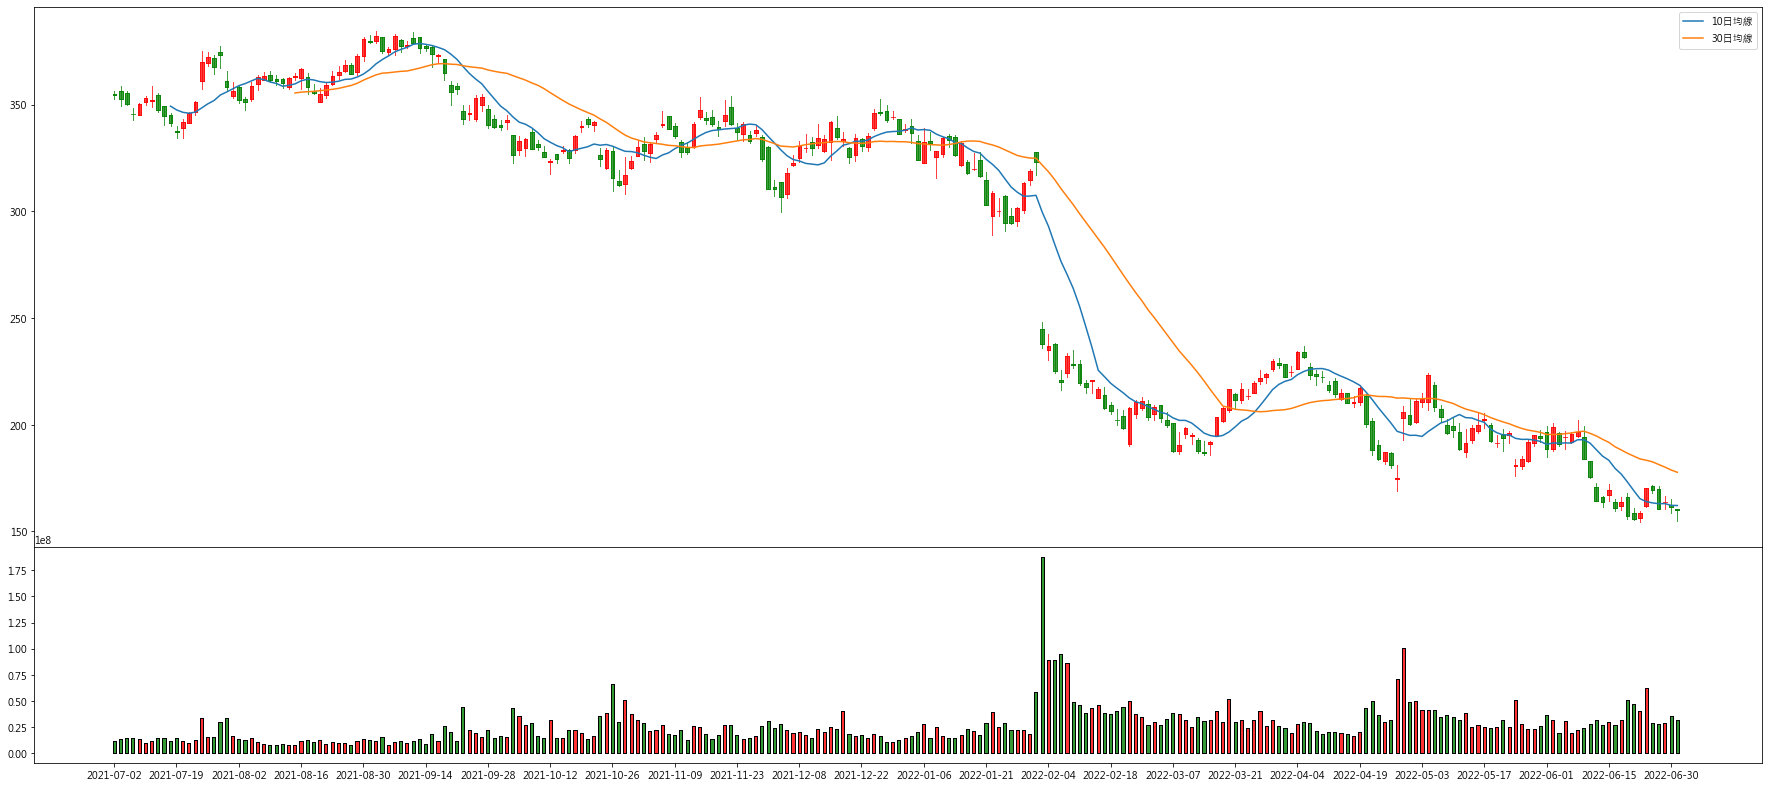

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr # get data
import matplotlib.pyplot as plt # visual
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import datetime as datetime # time
import talib # talib

start = datetime.datetime(2019,1,10)
end   = datetime.datetime(2020,11,10)
df = pdr.DataReader('FB', 'yahoo', start=start, end=end)

df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1) #add_subplot(上下切幾塊，左右切幾塊，左上到右下第幾塊)

ax.set_xticks(range(0, len(df.index), 10)) #x座標間格10個出現
ax.set_xticklabels(df.index[::10]) 
#open、close、high、low、寬度、顏色、透明度
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);
#-------------------------------------------------------------均線
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1) 

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

sma_10 = talib.SMA(np.array(df['Close']), 10) #10日均線
sma_30 = talib.SMA(np.array(df['Close']), 30) #30日均線

plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.legend();
#-------------------------------------------------------------成交量
sma_10 = talib.SMA(np.array(df['Close']), 10)
sma_30 = talib.SMA(np.array(df['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5]) # add_axes( x初始座標, y初始座標, 寬, 高)
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])

mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.legend();

mpf.volume_overlay(ax2, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10])


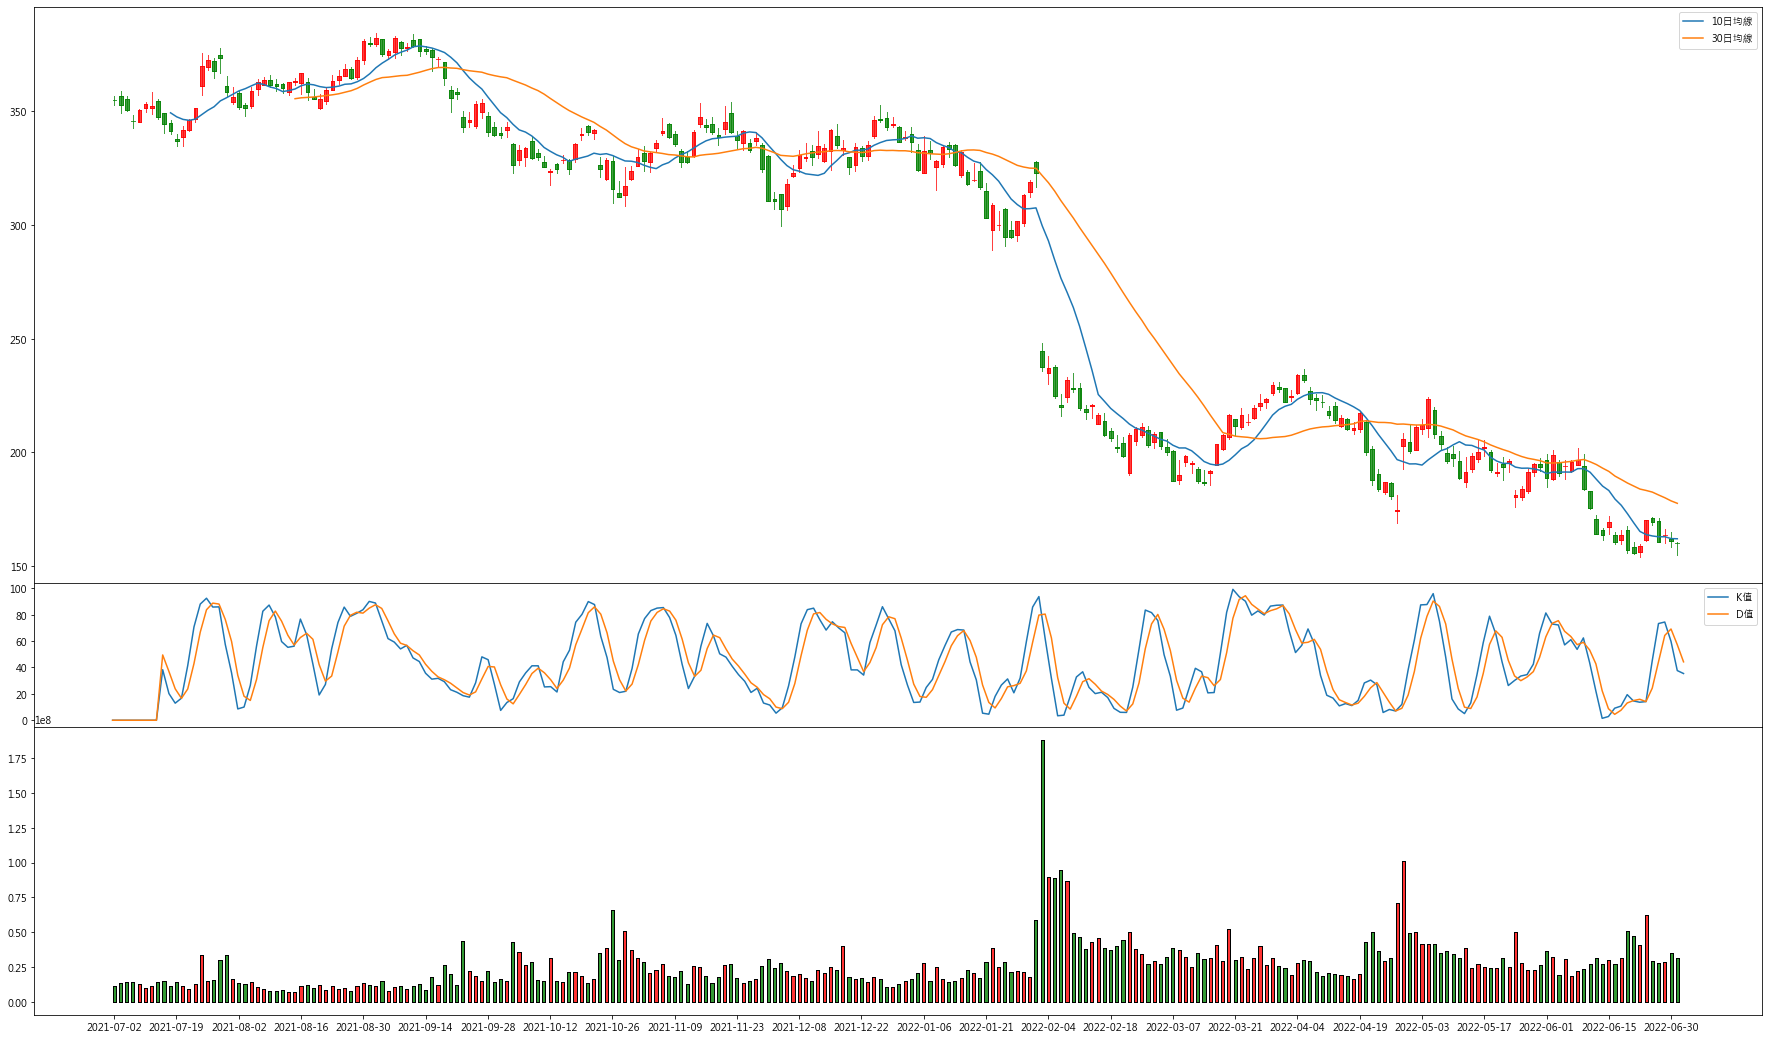

In [4]:
sma_10 = talib.SMA(np.array(df['Close']), 10)
sma_30 = talib.SMA(np.array(df['Close']), 30)
df['k'], df['d'] = talib.STOCH(df['High'], df['Low'], df['Close']) 
# fastk: 今日收盤價在這段行情波段中(行情的最高與最低值範圍中)所處的相對位置(百分比)值
# slowk: fastk的 3日修正式移動平均值
# slowd: slowk的 3日修正式移動平均值
df['k'].fillna(value=0, inplace=True)
df['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df['k'], label='K值')
ax2.plot(df['d'], label='D值')
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10])

mpf.volume_overlay(ax3, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df.index), 10))
ax3.set_xticklabels(df.index[::10])

ax.legend();
ax2.legend();

In [5]:
df['sma_10'] = sma_10
df['sma_30'] = sma_30
df['DIF'], df['DEM'], df['MACD'] = talib.MACD(df['Close'], fastperiod=6, slowperiod=12,signalperiod=9)

print(df)

                  High         Low        Open       Close    Volume  \
2021-07-02  356.440002  352.619995  355.100006  354.700012  11521300   
2021-07-06  358.790009  349.179993  356.500000  352.779999  13488500   
2021-07-07  356.489990  350.000000  355.260010  350.489990  14218900   
2021-07-08  348.329987  342.559998  345.730011  345.649994  14406500   
2021-07-09  350.709991  345.269989  345.320007  350.420013  13018700   
...                ...         ...         ...         ...       ...   
2022-06-27  171.750000  168.009995  171.320007  169.490005  29174600   
2022-06-28  171.300003  160.610001  169.899994  160.679993  27744500   
2022-06-29  166.330002  160.320007  163.570007  163.940002  28595200   
2022-06-30  165.229996  158.490005  162.149994  161.250000  35250600   
2022-07-01  160.619995  155.000000  160.309998  160.029999  31400700   

             Adj Close          k          d      sma_10      sma_30  \
2021-07-02  354.700012   0.000000   0.000000         NaN       

In [17]:
last_sma_10 = 0
last_sma_30 = 0
last_k = 0
last_d = 0
last_close = 0
last_DIF = 0
last_DEM = 0

flag = 0
tot = 0
budget = 10000000
cur = 0
cnt_act = 0
act_buy = 0
act_sell = 0
for i in df.index:
    if(flag != 0):
        cnt_act += 1
        
    if(last_close < df["Close"][i]):
        #print("Date", i, "up")
        if(flag == 1):
            tot += 1
            #*(df["Close"][i] - last_close)
        elif(flag == -1):
            tot -=1
            #*(df["Close"][i] - last_close)
    else:
        #print("Date", i, "down")
        if(flag == -1):
            tot += 1
            #*(last_close - df["Close"][i])
        elif(flag == 1):
            tot -= 1
            #*(last_close - df["Close"][i])
    #print(budget)
    flag = 0
    
    if((df["sma_10"][i] > df["sma_30"][i]) & (last_sma_10 < last_sma_30)): 
        #MA黃金交叉：短均線向上突破長均線
        flag = 1
    if((df["sma_10"][i] < df["sma_30"][i]) & (last_sma_10 > last_sma_30)): 
        #MA死亡交叉：短均線向下突破長均線
        flag = -1
    
    if((df["DIF"][i] > df["DEM"][i]) & (last_DIF < last_DEM)):
        flag = 1
    elif((df["DIF"][i] < df["DEM"][i]) & (last_DIF > last_DEM)):
        flag = -1


    if((df['k'][i] > df['d'][i]) & (last_k < last_d)): #KD黃金交叉：K值向上突破D值
        flag = 1
    if((df['k'][i] < df['d'][i]) & (last_k > last_d)): #KD死亡交叉：K值向下跌破D值
        flag = -1
      
    if(df['k'][i] < 20): 
        flag = 1
    elif(df['k'][i] > 80): 
        flag = -1


    if(df['Open'][i] == df['Close'][i]):
        if(df['Open'][i] == df['High'][i]): #open=close=high: 買盤
            flag = 1
        elif(df['Open'][i] == df['Low'][i]): #open=close=low: 下跌
            flag = -1
    elif(df['Open'][i] < df['Close'][i]): #red
        up_line = (df['High'][i] - df['Close'][i])
        down_line = (df['Open'][i] - df['Low'][i])
        if( up_line == 0 ): # 買
            flag = 1
        elif( down_line == 0 ): # 賣
            flag = -1
    elif(df['Open'][i] > df['Close'][i]):
        up_line = (df['High'][i] - df['Open'][i])
        down_line = (df['Close'][i] - df['Low'][i])
        if( down_line == 0 ): # 賣
            flag = -1
        elif( up_line == 0 ): # 買
            flag = 1
            
    if(flag == 1): #buy one
        budget -= df['Close'][i]
        cur += 1
        act_buy+=1
        print("Date: ",i, ", buy 1, cur", cur,", budget", budget)
    elif(flag == -1): # sell all
        if(cur != 0):
            act_sell+=1
            budget += df['Close'][i]*cur
            print("Date: ",i, ", sell", cur, ", budget", budget, ", gain", budget-10000000)
            cur = 0
            
    
    last_sma_10 = df["sma_10"][i]
    last_sma_30 = df["sma_30"][i]
    last_k = df["k"][i]
    last_d = df["d"][i]
    last_close = df["Close"][i]
    last_DIF = df['DIF'][i]
    last_DEM = df['DEM'][i]

Date:  2021-07-02 , buy 1, cur 1 , budget 9999645.299987793
Date:  2021-07-06 , buy 1, cur 2 , budget 9999292.519989014
Date:  2021-07-07 , buy 1, cur 3 , budget 9998942.02999878
Date:  2021-07-08 , buy 1, cur 4 , budget 9998596.380004883
Date:  2021-07-09 , buy 1, cur 5 , budget 9998245.959991455
Date:  2021-07-12 , buy 1, cur 6 , budget 9997892.799987793
Date:  2021-07-13 , buy 1, cur 7 , budget 9997540.709991455
Date:  2021-07-14 , buy 1, cur 8 , budget 9997193.079986572
Date:  2021-07-15 , buy 1, cur 9 , budget 9996848.619995117
Date:  2021-07-19 , buy 1, cur 10 , budget 9996511.66998291
Date:  2021-07-20 , buy 1, cur 11 , budget 9996170.009979248
Date:  2021-07-23 , sell 11 , budget 10000237.700073242 , gain 237.7000732421875
Date:  2021-08-02 , buy 1, cur 1 , budget 9999885.750061035
Date:  2021-08-03 , buy 1, cur 2 , budget 9999534.5100708
Date:  2021-08-04 , buy 1, cur 3 , budget 9999175.590057373
Date:  2021-08-06 , sell 3 , budget 10000266.12008667 , gain 266.1200866699219
Da

In [18]:
print(act_sell, act_buy, cnt_act)

30 93 163


In [7]:
last_sma_10 = 0
last_sma_30 = 0
last_k = 0
last_d = 0
last_close = 0
last_DIF = 0
last_DEM = 0

flag = 0
tot = 0
budget = 10000000
cur = 0
cnt_act = 0
for i in df.index:
    if(flag != 0):
        cnt_act += 1
        
    if(last_close < df["Close"][i]):
        print("Date", i, "up")
        if(flag == 1):
            tot += 1
            #*(df["Close"][i] - last_close)
        elif(flag == -1):
            tot -=1
            #*(df["Close"][i] - last_close)
    else:
        print("Date", i, "down")
        if(flag == -1):
            tot += 1
            #*(last_close - df["Close"][i])
        elif(flag == 1):
            tot -= 1
            #*(last_close - df["Close"][i])
    print(budget)
    flag = 0
    
    if((df["sma_10"][i] > df["sma_30"][i]) & (last_sma_10 < last_sma_30)): 
        #MA黃金交叉：短均線向上突破長均線
        print("buy_sma")
        flag = 1
    if((df["sma_10"][i] < df["sma_30"][i]) & (last_sma_10 > last_sma_30)): 
        #MA死亡交叉：短均線向下突破長均線
        print("sell_sma")
        flag = -1
    
    if((df["DIF"][i] > df["DEM"][i]) & (last_DIF < last_DEM)):
        print("buy_macd")
        flag = 1
    elif((df["DIF"][i] < df["DEM"][i]) & (last_DIF > last_DEM)):
        print("sell_macd")
        flag = -1


    if((df['k'][i] > df['d'][i]) & (last_k < last_d)): #KD黃金交叉：K值向上突破D值
        print("buy_kd")
        flag = 1
    if((df['k'][i] < df['d'][i]) & (last_k > last_d)): #KD死亡交叉：K值向下跌破D值
        print("sell_kd")
        flag = -1
      
    if(df['k'][i] < 20): 
        print("buy_kd")
        flag = 1
    elif(df['k'][i] > 80): 
        print("sell_kd")
        flag = -1


    if(df['Open'][i] == df['Close'][i]):
        if(df['Open'][i] == df['High'][i]): #open=close=high: 買盤
            print("buy_K")
            flag = 1
        elif(df['Open'][i] == df['Low'][i]): #open=close=low: 下跌
            print("sell_K")
            flag = -1
    elif(df['Open'][i] < df['Close'][i]): #red
        up_line = (df['High'][i] - df['Close'][i])
        down_line = (df['Open'][i] - df['Low'][i])
        if( up_line == 0 ): # 買
            print("buy_K")
            flag = 1
        elif( down_line == 0 ): # 賣
            print("sell_K")
            flag = -1
    elif(df['Open'][i] > df['Close'][i]):
        up_line = (df['High'][i] - df['Open'][i])
        down_line = (df['Close'][i] - df['Low'][i])
        if( down_line == 0 ): # 賣
            print("sell_K")
            flag = -1
        elif( up_line == 0 ): # 買
            print("buy_K")
            flag = 1
            
    if(flag == 1): #buy one
        budget -= df['Close'][i]
        cur += 1
    elif(flag == -1): # sell all
        if(cur != 0):
            budget += df['Close'][i]*cur
            cur = 0
    last_sma_10 = df["sma_10"][i]
    last_sma_30 = df["sma_30"][i]
    last_k = df["k"][i]
    last_d = df["d"][i]
    last_close = df["Close"][i]
    last_DIF = df['DIF'][i]
    last_DEM = df['DEM'][i]

Date 2021-07-02 up
10000000
buy_kd
Date 2021-07-06 down
9999645.299987793
buy_kd
Date 2021-07-07 down
9999292.519989014
buy_kd
Date 2021-07-08 down
9998942.02999878
buy_kd
Date 2021-07-09 up
9998596.380004883
buy_kd
Date 2021-07-12 up
9998245.959991455
buy_kd
Date 2021-07-13 down
9997892.799987793
buy_kd
Date 2021-07-14 down
9997540.709991455
buy_kd
Date 2021-07-15 down
9997193.079986572
buy_K
Date 2021-07-16 down
9996848.619995117
Date 2021-07-19 down
9996848.619995117
buy_kd
Date 2021-07-20 up
9996511.66998291
buy_kd
buy_kd
Date 2021-07-21 up
9996170.009979248
Date 2021-07-22 up
9996170.009979248
Date 2021-07-23 up
9996170.009979248
sell_kd
Date 2021-07-26 up
10000237.700073242
sell_kd
Date 2021-07-27 down
10000237.700073242
sell_kd
sell_kd
Date 2021-07-28 up
10000237.700073242
sell_kd
Date 2021-07-29 down
10000237.700073242
Date 2021-07-30 down
10000237.700073242
Date 2021-08-02 down
10000237.700073242
sell_macd
buy_kd
Date 2021-08-03 down
9999885.750061035
buy_kd
Date 2021-08-04 up

In [78]:
budget

10000198.57019043

2021-07-02    9.997162e+06
2021-07-06    9.997178e+06
2021-07-07    9.997196e+06
2021-07-08    9.997235e+06
2021-07-09    9.997197e+06
                  ...     
2022-06-27    9.998644e+06
2022-06-28    9.998715e+06
2022-06-29    9.998688e+06
2022-06-30    9.998710e+06
2022-07-01    9.998720e+06
Name: Close, Length: 252, dtype: float64